# 35. 名詞の連接

In [9]:
#!/usr/bin/env python
import re
import sys
f = open('neko.txt.mecab', 'r')
#p = re.compile('(名詞)+')
lines = f.readlines()
diclist = []
poslist = []
num = 0
tempmax = 1
n = 1
almax = 0
maxindex = 0
for line in lines:
	if line != "EOS\n":
		empty_dict = {}
		init_dict = {"surface":"","base":"","pos":"","pos1":""}
		str  = line.split("\t")
		init_dict["surface"] = str[0]
		str2 = str[1].split(",")
		init_dict["base"] = str2[6]
		init_dict["pos"] = str2[0]
		init_dict["pos1"] = str2[1]
		diclist.append(init_dict)
f.close
for dic in diclist:
    #名詞を見つけた場合、連続して名詞が続く限りwhileループして、
    #tempmaxを増やしていく
	if dic['pos'] == '名詞':
		while diclist[num + n]['pos'] == '名詞':
			tempmax += 1
			n += 1
            #ループを抜けたあと、今までの中で最長の値almaxと注目している名詞から始まる長さtempmaxを
            #くらべて、tempmaxの方が大きい場合、almaxをtempmaxの値に更新し、注目している名詞の
            #インデックスnumをmaxindexとして更新
		if tempmax > almax:
			almax = tempmax
			maxindex = num
	n = 1
	num += 1
	tempmax = 1
#almaxは最長の名詞列の長さの値なのでその数だけforを回し、みつけた最長の文字列を出力
for surfacenum in range(almax):
    #cornumは出力する配列のインデックス
	cornum = surfacenum + maxindex
	sys.stdout.write(diclist[cornum]['surface'])
	sys.stdout.write(" ")

明治 三 十 八 年 何 月 何 日 戸締り 

# 36. 単語の出現頻度

In [10]:
#!/usr/bin/env python
from collections import Counter

f = open('neko.txt.mecab', 'r')
lines = f.readlines()
diclist = []
count = 0
wordlist = []
for line in lines:
	if line != "EOS\n":
		empty_dict = {}
		init_dict = {"surface":"","base":"","pos":"","pos1":""}
		str  = line.split("\t")
		init_dict["surface"] = str[0]
		str2 = str[1].split(",")
		init_dict["base"] = str2[6]
		init_dict["pos"] = str2[0]
		init_dict["pos1"] = str2[1]
		diclist.append(init_dict)
        #wordlistはbaseのリスト
		wordlist.append(str2[6])
f.close
#collections.Counterを使うと便利
#most_common([n])(原文)
#最も多い n 要素を、カウントが多いものから少ないものまで順に並べたリストを返します。
# n が省略されるか None であれば、 most_common() はカウンタの 
# すべての 要素を返します。等しいカウントの要素は任意に並べられます:
counter = Counter(wordlist)
for word, cnt in counter.most_common(10):
	print(word, cnt)

の 9114
。 7484
、 6772
て 6678
は 6384
に 6162
を 6068
だ 5827
と 5477
が 5259


# 37. 頻度上位10語

※matplotlibが日本語に対応しておらず、フォントを設定する必要がある(しないと日本語はすべて豆腐になる)  
設定方法は、  
http://ipafont.ipa.go.jp/　 から日本語のフォントをダウンロードして解凍  
↓  
ゴシック体の場合はipaexg.ttf、明朝体の場合はipaexm.ttfというファイルを  
matplotlibのデフォルト設定ファイルの置いてあるフォルダにあるfonts/ttf/フォルダにコピー  
（フォルダの場所は、\$ python3  → >>> import matplotlib  → >>> matplotlib.matplotlib_fname()  で検索できる)  
↓  
matplotlibrcファイルを開く  
↓  
ゴシック体の場合 font.family : IPAexGothic  
明朝体の場合 font.family : IPAexMincho  
という行を追加  
(見やすくするなら150~160行目くらいのところにfontの欄があるはずなのでそこに書いても良い)  
↓  
matplotlibは使うフォントのキャッシュを持っているので、さきにキャッシュを削除しておく  
$ python3  
↓  
\>>>　import matplotlib  
↓  
\>>> matplotlib.get_cachedir()  
でキャッシュの場所を検索し、そこにあるfontList.py3k.cacheを削除  
  
これで日本語化ができます  

の 9114
。 7484
、 6772
て 6678
は 6384
に 6162
を 6068
だ 5827
と 5477
が 5259


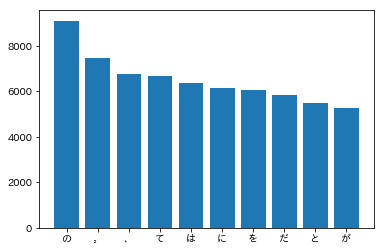

In [11]:
#!/usr/bin/env python
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


f = open('neko.txt.mecab', 'r')
lines = f.readlines()
diclist = []
count = 0
wordlist = []
x = np.array( [] )
y = np.array( [] )

for line in lines:
	if line != "EOS\n":
		empty_dict = {}
		init_dict = {"surface":"","base":"","pos":"","pos1":""}
		str  = line.split("\t")
		init_dict["surface"] = str[0]
		str2 = str[1].split(",")
		init_dict["base"] = str2[6]
		init_dict["pos"] = str2[0]
		init_dict["pos1"] = str2[1]
		diclist.append(init_dict)
		wordlist.append(str2[6])
f.close

#most_common([n])(原文)
#最も多い n 要素を、カウントが多いものから少ないものまで順に並べたリストを返します。
# n が省略されるか None であれば、 most_common() はカウンタの 
# すべての 要素を返します。等しいカウントの要素は任意に並べられます:
counter = Counter(wordlist)
for word, cnt in counter.most_common(10):
	print(word, cnt)
    #得られた上位10この単語と、その回数をnumpy配列に追加
	x = np.append( x, word )
	y = np.append( y, cnt )

# matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None,
#                       data=None, **kwargs)
#表示する文字をx内の文字に設定
label = x
#x座標の数を10個に設定
left = np.array([1,2,3,4,5,6,7,8,9,10])
#高さをyの値に設定
height = y
#plt.barは棒グラフの生成
plt.bar(left, height,tick_label=label, align="center")
#グラフの出力
plt.show()

# 38. ヒストグラム

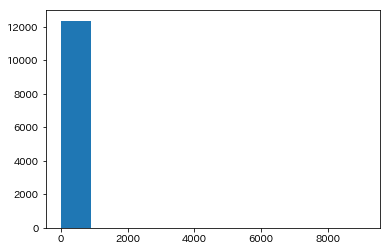

In [12]:
#!/usr/bin/env python
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


f = open('neko.txt.mecab', 'r')
lines = f.readlines()
diclist = []
count = 0
wordlist = []
x = np.array( [] )
y = np.array( [] )

for line in lines:
	if line != "EOS\n":
		empty_dict = {}
		init_dict = {"surface":"","base":"","pos":"","pos1":""}
		str  = line.split("\t")
		init_dict["surface"] = str[0]
		str2 = str[1].split(",")
		init_dict["base"] = str2[6]
		init_dict["pos"] = str2[0]
		init_dict["pos1"] = str2[1]
		diclist.append(init_dict)
		wordlist.append(str2[6])
f.close

#most_common([n])(原文)
#最も多い n 要素を、カウントが多いものから少ないものまで順に並べたリストを返します。
# n が省略されるか None であれば、 most_common() はカウンタの 
# すべての 要素を返します。等しいカウントの要素は任意に並べられます:
counter = Counter(wordlist)
for word, cnt in counter.most_common():
	x = np.append( x, word )
	y = np.append( y, cnt )

# matplotlib.pyplot.bar(left, height, width=0.8, bottom=None, hold=None,
#                       data=None, **kwargs)
label = x
#left = np.array([1,2,3,4,5,6,7,8,9,10])
height = y
plt.hist(y)
plt.show()

# 39. Zipfの法則

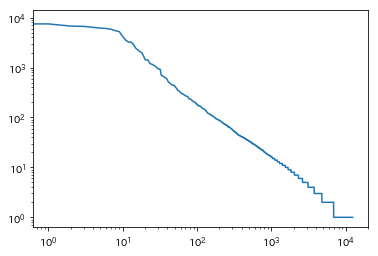

In [13]:
#!/usr/bin/env python
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt


f = open('neko.txt.mecab', 'r')
lines = f.readlines()
diclist = []
count = 0
wordlist = []
x = np.array( [] )
y = np.array( [] )

for line in lines:
	if line != "EOS\n":
		empty_dict = {}
		init_dict = {"surface":"","base":"","pos":"","pos1":""}
		str  = line.split("\t")
		init_dict["surface"] = str[0]
		str2 = str[1].split(",")
		init_dict["base"] = str2[6]
		init_dict["pos"] = str2[0]
		init_dict["pos1"] = str2[1]
		diclist.append(init_dict)
		wordlist.append(str2[6])
f.close

#most_common([n])(原文)
#最も多い n 要素を、カウントが多いものから少ないものまで順に並べたリストを返します。
# n が省略されるか None であれば、 most_common() はカウンタの 
# すべての 要素を返します。等しいカウントの要素は任意に並べられます:
counter = Counter(wordlist)
for word, cnt in counter.most_common():
    #xの値は出現度順位なのでcountを用意
	x = np.append( x, count )
	y = np.append( y, cnt )
	count += 1
#x,yの値の対数をとる
plt.xscale("log")
plt.yscale("log")
#プロット
plt.plot(x,y)
#出力
plt.show()